In [1]:
import os
import ee
import datetime
import time
import sklearn
import importlib

import geopandas as gp
import pandas as pd
import numpy as np
import rsfuncs as rs
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from pandas.tseries.offsets import MonthEnd
from dateutil.relativedelta import relativedelta
from sklearn import preprocessing

ee.Initialize()

In [2]:
# Load cv shapefile
cvsa = gp.read_file("../shape/cv.shp")
crs = {"init":"epsg:4326"}
cvsa.crs = crs

# CVW shapefile 
cvw = gp.read_file("../shape/HU4_merged.shp")

# # irrigated
irrigated = gp.read_file("../shape/irrigated.shp")
non_irrigated = gp.read_file("../shape/non_irrigated.shp")

# SSJT
s = gp.read_file("../Shape/1802_4.shp")
sj = gp.read_file("../Shape/1804_4.shp")
t = gp.read_file("../Shape/1803_4.shp")

# grace footprint
grace_sa = gp.read_file("../shape/argus_grace.shp")

# Casgem wells 
casgem = gp.read_file("../shape/casgem_wells.shp")
casgem = gp.sjoin(casgem,cvsa, op ='within')

/anaconda3/envs/gis/lib/python3.6/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


In [3]:
# Make EE objects from shapefiles 

In [4]:
area_irr = rs.get_area(irrigated, fast = True)

In [5]:
area_non_irr = rs.get_area(non_irrigated, fast = True)

In [6]:
area_cv = rs.gdf_to_ee_poly(cvsa)

In [7]:
area_cvw = rs.gdf_to_ee_poly(cvw)

In [8]:
data = rs.load_data()

In [9]:
# Time params 
years = range(2001, 2019)
months = range(1,13)
start = datetime.datetime(years[0], 1, 1)
end = datetime.datetime(years[-1]+1, 1, 1)
dt_idx = pd.date_range(start,end, freq='M')

# Non irrigated ET

In [10]:
# Fetch AET in non-irrigated within CV 
fldas_aet = rs.monthly_sum(data['fldas_aet'], years, months, area_non_irr)
modis_aet = rs.monthly_sum(data['modis_aet'], years, months, area_non_irr)
tc_aet = rs.monthly_sum(data['tc_aet'], years, months, area_non_irr)
gldas_aet = rs.calc_monthly_sum(data['gldas_aet'], years, months, area_non_irr)

2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete


TypeError: calc_monthly_sum() takes 3 positional arguments but 4 were given

In [18]:
gldas_aet = rs.calc_monthly_sum(data['gldas_aet'], years, months, area_non_irr)

0.29042525027133087
0.4615315512156677
1.1006665379532252
1.2821448773122686
1.4282462082270853
0.7909856419026978
0.4368506802056403
0.2170245197305961
0.13829078051672097
0.12690156131361335
0.2393490746611502
0.20662494606987206
0.3239619244085437
0.5702343769932803
1.063021292882509
1.207732654381884
1.1413688715876524
0.8080404285534469
0.41309379294635323
0.19556834926774655
0.09446326741861723
0.045447416246572545
0.3010343786971537
0.32721650631806015
0.4167230228515424
0.619745058448878
1.214724769742498
1.2220633895285684
1.5685307987919865
1.109227700059873
0.6461094339011985
0.4234171741651499
0.18559413227828558
0.08293511210481874
0.14837551223707507
0.2485001746287654
0.3318214554273778
0.4882611877248113
1.3644516758467458
1.3916096393458919
0.9745010944494382
0.5966498119306263
0.33257193795773904
0.17829635827852863
0.10247037250301542
0.21811935860826748
0.35204709165090914
0.287513613384747
0.3654680943660015
0.5977207034932054
1.1876682432106138
1.6173673586240027


In [14]:
# PET in non-irrigated (no gldas/nldas)
gmet_pet_non_irr = rs.monthly_sum(data['gmet_eto'], years, months, area_non_irr)
gmet_pet2_non_irr = rs.monthly_sum(data['gmet_etr'], years, months, area_non_irr)
modis_pet_non_irr = rs.monthly_sum(data['modis_pet'], years, months, area_non_irr)
tc_pet_non_irr = rs.monthly_sum(data['tc_pet'], years, months, area_non_irr)

# gldas_pet_non_irr = calc_monthly_sum(data['gldas_pet'], years, months, area_non_irr)
# nldas_pet_non_irr = rs.calc_monthly_sum(data['nldas_pet'], years, months, area_non_irr)

2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete


# Irrigated ET

In [16]:
etr_g = rs.monthly_sum(data['gmet_etr'],years, months, area_irr)

2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete


In [15]:
# Fetch PET data in irrigated
eto_g = rs.monthly_sum(data['gmet_eto'],years, months, area_irr)
etr_g = rs.monthly_sum(data['gmet_etr'],years, months, area_irr)

2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015


EEException: Server returned HTTP code: 502

In [19]:
modis_pet = rs.monthly_sum(data['modis_pet'], years, months, area_non_irr)

2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete
1.093875192842379
1.268182235474655
2.9704066023948292
4.161906906212226
8.058027487232867
8.529828258305278
8.002662447330868
7.939807062491792
6.207171640057294
4.8438029118403225
1.6469575161183514
0.7613403764969706
1.1598879701958018
1.8874732368289608
3.2775113307222496
4.673447921542171
6.75558983227787
8.704818304605645
8.992947181026443
8.108408994679413
6.661958433857659
4.636011890575494
2.3554683219856973
1.0823944980048894
1.4665274586031336
2.024646701280476
3.569884521315624
3.5607709868163573
6.486418436395764
8.312440205039875
9.198894806777018
7.944055157267104
6.803407498523005
5.241097239424657
1.8988413634027774
0.9393321920235465
1.1208307524501862
1.4200988455493515
3.9393207606417193
5.7851904743486
7.300225417401404
8.469808579780658
8.53117846759532
7.709158043859685
6.56924129731227
3.4967131092203116
1.8273077035158436
1.2572407130431051
0.9103549502385

EEException: Server returned HTTP code: 502

In [40]:
gldas_pet = rs.calc_monthly_sum(data['gldas_pet'], years, months, area_irr)

1.093875192842379
1.268182235474655
2.9704066023948292
4.161906906212226
8.058027487232867
8.529828258305278
8.002662447330868
7.939807062491792
6.207171640057294
4.8438029118403225
1.6469575161183514
0.7613403764969706
1.1598879701958018
1.8874732368289608
3.2775113307222496
4.673447921542171
6.75558983227787
8.704818304605645
8.992947181026443
8.108408994679413
6.661958433857659
4.636011890575494
2.3554683219856973
1.0823944980048894
1.4665274586031336
2.024646701280476
3.569884521315624
3.5607709868163573
6.486418436395764
8.312440205039875
9.198894806777018
7.944055157267104
6.803407498523005
5.241097239424657
1.8988413634027774
0.9393321920235465
1.1208307524501862
1.4200988455493515
3.9393207606417193
5.7851904743486
7.300225417401404
8.469808579780658
8.53117846759532
7.709158043859685
6.56924129731227
3.4967131092203116
1.8273077035158436
1.2572407130431051
0.9103549502385949
1.485390604320341
2.9137163660558385
4.511852474279953
5.737519017058018
7.071871180421801
8.7464837209

In [25]:
tc_pet = rs.monthly_sum(data['tc_pet'], years, months, area_non_irr)

2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete


In [36]:
nldas_pet = rs.calc_monthly_sum(data['nldas_pet'], years, months, area_irr)

1.4768658672234793
1.6925203052744069
3.192994389142518
3.9918195913521832
7.130082283672662
7.899617128239801
8.188425115865392
7.730148726300092
5.8855739431703125
4.3287524961118
1.9038092826274053
1.1189175766716908
1.2967935727055278
1.7639399674931902
2.983562742360946
4.109254571270344
6.099984383828736
7.7427633637138555
8.377974656057443
7.698208323437896
6.032686389408508
4.114049743379862
2.1189266599241265
1.1990977942643006
1.3751235450092436
1.897193937183318
3.059985569526145
3.477546365058334
5.55821431013051
7.412320113324187
8.621674288727958
7.438603200538357
6.254691421638268
4.613423686766768
1.978466710252752
1.2150572431344404
1.405716587521459
1.635334635422074
3.46344168022853
5.02216040365349
6.706194899066379
7.996330735690336
8.366356715214401
7.64667857741026
6.150896314103326
3.606220141459174
1.7545009868492711
1.329357958885042
1.1739521264681698
1.656004167381497
2.734027276510499
3.730165969896071
5.057732764742884
6.318002176427926
8.31160178676681
7.

In [383]:
# Make the objects into a dict, sum the irrigated PET and non irrigated AET 
d_aet_irr = {"fldas_aet": fldas_aet,  "gldas_aet":gldas_aet[:-1], "modis_aet":modis_aet, "tc_aet": tc_aet}
d_pet_irr = {"nldas_etr": nldas_pet[:-1], "gldas_etr": gldas_pet[:-1], "gmet_eto": eto_g, "gmet_etr": etr_g, "modis_pet": modis_pet, "tc_pet":tc_pet}
d_pet_total = {"gmet_sum1": [a + b for a, b in zip(eto_g, gmet_pet_non_irr)],
               "gmet_sum2": [a + b for a, b in zip(etr_g ,gmet_pet2_non_irr)],
               "modis_sum": [a + b for a, b in zip(modis_pet,modis_pet_non_irr)],
               "tc_sum": [a + b for a, b in zip(tc_pet,tc_pet_non_irr)],
              }

cv_ag_dict_list = [d_aet_irr, d_pet_irr, d_pet_total]


# Whole Central Valley

In [42]:
# AET (subtract from CVW)
cv_fldas_aet = rs.monthly_sum(data['fldas_aet'], years, months, area_cv)
cv_modis_aet = rs.monthly_sum(data['modis_aet'], years, months, area_cv)
cv_tc_aet = rs.monthly_sum(data['tc_aet'], years, months, area_cv)
cv_gldas_aet = rs.calc_monthly_sum(data['gldas_aet'], years, months, area_cv)

2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete
0.8960267383105277
1.3878076827286445
3.2759303754093176
3.9293071891875235
4.57329218701831
2.6784568623971268
1.5634933706290361
0.7742062376977256
0.5009715737219199
0.457598768213419
0.743521483458734
0.644127811778591
0.986819798516367
1.715547206011331
3.1881498909707324
3.7046097761846672
3.687811973612695
2.8001275060668553
1.5058045789930707
0.7101864734193889
0.33582040194171775
0.1658737833265886
0.9615699525296
0.9723697385555946
1.2554673679032997
1.8712033019214371
3.635571740245167
3.687308141267716
4.95248198467824
3.7159546154945806
2.2251474229896306
1.4390139413084595
0.6529143329574421
0.2981824020697545
0.48190209482694873
0.7669549691474065
1.007034

In [109]:
# PET (subtract from cvw)
cv_gmet_pet = rs.monthly_sum(data['gmet_eto'], years, months, area_cv)
cv_gmet_pet2 = rs.monthly_sum(data['gmet_etr'], years, months, area_cv)
cv_modis_pet = rs.monthly_sum(data['modis_pet'], years, months, area_cv)
cv_tc_pet = rs.monthly_sum(data['tc_pet'], years, months, area_cv)


2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete


In [108]:
cv_gldas_pet = rs.calc_monthly_sum(data['gldas_pet'], years, months, area_cv)
cv_nldas_pet = rs.calc_monthly_sum(data['nldas_pet'], years, months, area_cv)

2.603159982991776
3.024557857230464
7.109039826993549
9.9788866041612
19.43201641104058
20.578683889818823
19.35034388955955
19.233611256523538
14.994141323649052
11.685188589116377
3.896907560632429
1.8128204153780738
2.7459587228025306
4.46432127819268
7.824378529719366
11.202811052521527
16.25205038613642
21.03854262593387
21.718324085200802
19.68425403278602
16.088169096515877
11.27454687490737
5.6781805215058885
2.612263356626622
3.4772239134112786
4.866164725101784
8.54334440400957
8.493991703763918
15.6438791701947
20.146855774461017
22.28957079492573
19.194151916309572
16.48663158277619
12.662050761611072
4.55787997391849
2.2524806870535334
2.6736866360383003
3.4253765145929553
9.478428632532394
13.88101881005134
17.59665255377835
20.47812074830591
20.693692237886818
18.737324042975565
15.926452504357165
8.484579454693781
4.423953206734968
3.0043098778150625
2.188587613887076
3.575659485841487
7.032424313203768
10.820962796585663
13.736568905351225
16.95146157769454
21.18132809

In [43]:
# Soil moisture
cv_tc_sm = rs.monthly_sum(data['tc_sm'], years, months, area_cv)

2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete


KeyError: 'gldas_sm'

In [44]:
cv_gldsm1 = rs.calc_monthly_sum(data['gsm1'], years, months, area_cv)
cv_gldsm2 = rs.calc_monthly_sum(data['gsm2'], years, months, area_cv)
cv_gldsm3 = rs.calc_monthly_sum(data['gsm3'], years, months, area_cv)
cv_gldsm4 = rs.calc_monthly_sum(data['gsm4'], years, months, area_cv)

1.487800990118464
1.4582368308172784
1.5869246075034689
1.3551931990413786
0.9598113374642465
0.6742079162594151
0.6170822967078644
0.5386007521733776
0.5461590645692167
0.6752952389611743
1.2103774521119168
1.5737062841669966
1.5973453907609365
1.3495476239083188
1.4797907445452452
1.178611488689281
0.9968316967249422
0.7053718980093527
0.5713924360419307
0.515557007893305
0.48645784366983785
0.5179289772130871
1.0798744268175482
1.54341750398475
1.564864500224079
1.3866332991714885
1.4856307822877466
1.474056133718305
1.277118461038315
0.7698472738864041
0.6041203066291674
0.6633936038494899
0.5842554256582969
0.5517290518048531
0.8719468917953255
1.4787207721774331
1.588042626950798
1.5234773734494502
1.4565406146594149
1.0959302530831625
0.8318382236763352
0.6438987178519381
0.5634805150313006
0.5177491162203497
0.5088808334871102
0.9135359336616946
1.274537698409226
1.4473128441800038
1.7501856961227023
1.5241091519937315
1.64845506808499
1.4830862063225796
1.423929677292386
1.002

In [47]:
cv_gldas_sm = rs.calc_monthly_sum(data['gldas_sm'], years ,months,area_cv)

12.629757367272056
14.08555174839158
17.68422288195742
15.470182717937242
12.6460238197429
9.151803949150633
7.762948257521673
6.778315297097483
6.1671785581795
6.362005882410138
8.354694483679452
13.812278498977944
17.582741190335938
15.160721139765505
16.66625122150153
14.12536859772729
12.078219912474703
9.1785380171449
7.513395925523277
6.527545245721983
5.897181922325629
5.938603800087235
8.06766971946315
13.272827313439144
17.303295390394016
15.577449716514792
16.933495242102968
16.469882501549392
15.386767219827595
10.853816378803279
8.42019628933716
7.2730462945273295
6.442940672919931
6.342986533207004
6.645550746363855
11.538911514637451
16.233584730723354
16.259517257823966
16.969133369739072
13.448517369871926
10.755441518615964
8.342884092175556
7.12450041338842
6.303295698375164
5.766143157856703
7.127439817457471
10.572625064589886
13.276039854337471
18.59246998082367
17.094357877271428
18.80874235250246
17.518546721720273
16.835669898843474
13.127819475782257
10.2084416

In [48]:
# Precipitation
cv_p_p = rs.monthly_sum(data['prism'], years, months, area_cv)
cv_p_c = rs.monthly_sum(data['chirps'], years, months, area_cv)
cv_p_n = rs.monthly_sum(data['persia'], years, months, area_cv)
cv_p_t = rs.monthly_sum(data['trmm'], years, months, area_cv)
cv_p_d = rs.monthly_sum(data['dmet'], years, months, area_cv)

2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete


In [50]:
# Runoff
cv_r_tc = rs.monthly_sum(data['tc_r'], years, months, area_cv)
cv_r_fldas = rs.monthly_sum(data['fldas_r'], years, months, area_cv)

cv_gldas_ssr = rs.calc_monthly_sum(data['ssr'], years, months, area_cv)
cv_gldas_bfr = rs.calc_monthly_sum(data['bfr'], years, months, area_cv)
cv_gldas_qsm = rs.calc_monthly_sum(data['qsm'], years, months, area_cv)

2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete
0.09695545785041165
0.23412852801650075
0.21840826438198455
0.1096566442648988
0.0005266861986218836
0.0006467053077639302
8.38306771705594e-05
7.794512352488071e-06
0.0024899999699433606
0.009767781777330103
0.15278197749566713
0.46830592503558205
0.28641717565912045
0.08962275023425265
0.19438234520758318
0.014536343839776537
0.00972398381407323
5.204246167684958e-05
2.1454754546886506e-06
3.4227501332215774e-07
4.363108071349784e-06
1.461847685671221e-05
0.1022390086859539
1.0023382096437883
0.1005901614565285
0.12099221359492995
0.17215397617119838
0.38549817777699685
0.08013512657231546
4.30147576816383e-05
7.82862629796976e-05
0.0032669121917765767
2.9450126064300015e-05
3.5445078705425556e-05
0.11724783124067426
0.34065204880065875
0.16121485006482142
0.924117519926700

In [326]:
# Make a df from everything 
cv_d_r = {"gldas_ssr":cv_gldas_ssr[:-1] , "gldas_bfr": cv_gldas_bfr[:-1], "gldas_qsm": cv_gldas_qsm[:-1],
       "gldas":np.column_stack(np.array(x) for x in [cv_gldas_ssr[:-1],cv_gldas_bfr[:-1],cv_gldas_qsm[:-1]]).sum(axis=1), 
       "fldas_r": cv_r_fldas[:-1], "tc_r": cv_r_tc}

cv_d_p = {'p_prism': cv_p_p, "p_chirps": cv_p_c, "p_persiann": cv_p_n,"p_trmm": cv_p_t, "p_daymet": cv_p_d}
cv_d_sm = {"gldas_sm": cv_gldas_sm[:-1], "tc_sm": cv_tc_sm, 
           "gldas_m": np.column_stack(np.array(x) for x in [cv_gldsm1[:-1],cv_gldsm2[:-1],cv_gldsm3[:-1], cv_gldsm4[:-1]]).mean(axis=1)}
cv_d_aet = {"fldas_aet": cv_fldas_aet,  "gldas_aet":cv_gldas_aet[:-1], "modis_aet":cv_modis_aet, "tc_aet": cv_tc_aet}
cv_d_pet = {"nldas_etr": cv_nldas_pet[:-1], "gldas_etr": cv_gldas_pet[:-1], "gmet_eto": cv_gmet_pet, "gmet_etr": cv_gmet_pet2, "modis_pet": cv_modis_pet, "tc_pet":cv_tc_pet}


cv_dict_list = [cv_d_r, cv_d_p, cv_d_sm, cv_d_aet, cv_d_pet]

# Central Valley Watershed 

In [52]:
# AET (don't need PET)
cvw_fldas_aet = rs.monthly_sum(data['fldas_aet'], years, months, area_cvw)
cvw_modis_aet = rs.monthly_sum(data['modis_aet'], years, months, area_cvw)
cvw_tc_aet = rs.monthly_sum(data['tc_aet'], years, months, area_cvw)
cvw_gldas_aet = rs.calc_monthly_sum(data['gldas_aet'], years, months, area_cvw)

2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete
2.5726641050877834
3.6789994960535988
7.910427117344955
10.676598754380548
14.211484017276149
9.4236024473253
6.353369245274486
3.167014475067725
2.05492686423411
1.7159575086213303
2.2749242626536454
1.8143972542106868
2.577877329882009
4.339219459233703
7.918611294607335
10.091373431836432
11.747951711950366
10.541702192541935
6.566652429239789
3.0127155580667253
1.432452110840886
0.7108621073566532
3.0808534505896863
2.653681851901394
3.4394313187830563
4.713102091392936
9.058343755066833
9.742924048169384
14.833660362598815
12.905519561571408
8.452823786819414
5.414332072899744
2.6729748302762593
1.2341296792509409
1.5746363242528014
2.3843727202862803
2.669620107183

In [218]:
# PET
cvw_gmet_pet = rs.monthly_sum(data['gmet_eto'], years, months, area_cvw)
cvw_gmet_pet2 = rs.monthly_sum(data['gmet_etr'], years, months, area_cvw)
cvw_modis_pet = rs.monthly_sum(data['modis_pet'], years, months, area_cvw)
cvw_tc_pet = rs.monthly_sum(data['tc_pet'], years, months, area_cvw)

2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete


In [219]:
cvw_gldas_pet = rs.calc_monthly_sum(data['gldas_pet'], years, months, area_cvw)
cvw_nldas_pet = rs.calc_monthly_sum(data['nldas_pet'], years, months, area_cvw)

6.10993431247668
6.831933451703487
16.72126792615276
26.121310768635766
55.32304798996719
58.80688846650873
56.729957345125584
57.199589874492446
43.810625137183514
33.86373867469235
10.855306523313654
4.166350501117717
6.332711935288058
10.401816860072874
18.9878718518847
30.601501321298738
45.91716150270618
60.69631093237273
63.730490258063384
58.23340382301736
46.78224435607457
32.885154674376686
16.667181308998252
6.6153396996542995
8.525941265883041
12.077280917432237
21.67542514709204
21.75233306236814
43.46619578633892
59.67537327141256
64.60315096020085
54.88458585579064
47.70292563423975
37.03667142276291
11.978497777989004
5.899592170070842
6.073422228111642
7.998772916568909
25.24203657507227
38.64882409554735
49.67684569984852
58.89638962848047
60.785278481925246
54.52313038335064
45.62959089739608
24.40499014647708
11.80545048946162
7.8578882420534315
5.046980732756307
8.546654954586673
18.676387461570606
28.271204779738408
37.24658216418109
47.55058210757198
61.3093095176

In [53]:
# Precipitation
cvw_p_p = rs.monthly_sum(data['prism'], years, months, area_cvw)
cvw_p_c = rs.monthly_sum(data['chirps'], years, months, area_cvw)
cvw_p_n = rs.monthly_sum(data['persia'], years, months, area_cvw)
cvw_p_t = rs.monthly_sum(data['trmm'], years, months, area_cvw)
cvw_p_d = rs.monthly_sum(data['dmet'], years, months, area_cvw)

2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete


In [54]:
# Runoff
cvw_r_tc = rs.monthly_sum(data['tc_r'], years, months, area_cvw)
cvw_r_fldas = rs.monthly_sum(data['fldas_r'], years, months, area_cvw)

cvw_gldas_ssr = rs.calc_monthly_sum(data['ssr'], years, months, area_cvw)
cvw_gldas_bfr = rs.calc_monthly_sum(data['bfr'], years, months, area_cvw)
cvw_gldas_qsm = rs.calc_monthly_sum(data['qsm'], years, months, area_cvw)

2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
wrapper complete
0.2197819427864528
0.6051863762431525
1.059777750479529
0.2940112784916005
0.009685589686629383
0.0022065344008270586
0.0007465376358808636
3.3131618492936017e-05
0.0071149962309217055
0.025111096880993323
0.315918004510258
0.9560410859817805
0.5698101893787862
0.3034786755423279
0.528120482713142
0.0652836885963484
0.021432854316817837
0.00023270815349442811
3.6993666936743425e-05
5.379170579587137e-06
0.00016303524923233539
6.300324089522183e-05
0.19320762664089366
2.024232718629647
0.2498103348291037
0.25194239635228627
0.4822296256903499
0.9802262477145282
0.17131775244036163
0.00014487202124661158
0.0004520301524596251
0.008115260524599799
0.0003615982395644996
0.00014299083665541328
0.27372355503124046
0.6785162359545641
0.32434400151375126
2.1484166184073907
0.21987412

In [57]:
#SWE
cvw_gldas_swe = rs.calc_monthly_sum(data['gldas_swe'], years, months, area_cvw)
cvw_fldas_swe = rs.calc_monthly_sum(data['fldas_swe'], years, months, area_cvw)

1.4305022175202027
3.066434814600659
3.4145821117497586
0.688120422931028
0.022348198612075133
0.0013167828437788752
0.002774573041994667
0.004167934282523827
0.005230211010193114
0.006559596602251047
0.27820130642758023
3.1717854470506834
4.903969912054903
3.9397383561253494
2.248220130372506
0.1157022723619745
0.0271380251600394
0.0014397184072746612
0.0009879258071626216
0.0014116718866935896
0.0019543013552315858
0.010205417374031559
0.10848912425894854
1.8572144009535405
2.201879720691395
0.7757632112273134
0.5330351594369283
0.4540882575879885
0.14497107870973952
0.00035626564563474123
4.022919693917626e-05
3.439695632715446e-05
0.00022792275038442127
0.002245362346662849
0.14249127664856365
0.9435528213413819
3.2885355977942985
3.277681926183353
1.6687874961081213
0.05321716025034116
0.007612892179597258
0.0019304022901104458
0.0020937035525744486
0.0028140168847264123
0.0039770248785395415
0.2143605913918483
0.5715301950994987
1.0010627048249447
5.322429808283255
3.987472178726

In [63]:
# SM
cvw_gldas_sm = rs.calc_monthly_sum(data['gldas_sm'], years ,months,area_cvw)
cvw_tc_sm = rs.monthly_sum(data['tc_sm'], years, months, area_cvw)

37.692773099060815
40.81000886047508
52.65637148155327
49.56403420724456
42.14860058085542
30.41338822679589
25.00190750504271
20.859009796155338
18.552766492884047
19.0805405066308
24.80942877585121
39.87671890005566
52.01470561815078
46.41752983664395
53.946958618518124
48.21369378149858
42.26638756052922
31.894688949048874
24.81794307517472
20.38988564851708
17.905689999786258
17.80103785376261
23.35816025836415
37.80457935366954
52.59264752177377
48.75794766888292
54.11789989873806
54.16980706196873
51.855598422232
36.57745753410729
27.541027611644942
23.099122192365193
19.992852620958
19.285038233916065
20.27436640057353
35.579537348394275
48.28836310241327
50.123885071940954
55.10378246119827
45.761363142059714
38.165976138543755
29.514671666255683
23.727527162789773
19.85178832477461
17.727725119646788
21.404457671123073
31.799919780059383
40.11313911651091
54.41783275995865
52.41310625485017
60.01727466652165
57.975986384462864
57.86155553775786
46.28045518311145
35.79798630727

In [66]:
cvw_gldsm1 = rs.calc_monthly_sum(data['gsm1'], years, months, area_cvw)
cvw_gldsm2 = rs.calc_monthly_sum(data['gsm2'], years, months, area_cvw)
cvw_gldsm3 = rs.calc_monthly_sum(data['gsm3'], years, months, area_cvw)
cvw_gldsm4 = rs.calc_monthly_sum(data['gsm4'], years, months, area_cvw)

4.763909959446207
4.749201675762072
4.959620680254109
4.133892360184625
2.8464172417504985
1.952602992687749
1.787748530306907
1.4434935440983556
1.5024108141653885
1.9022588948832102
3.41060119396649
4.889241788078233
4.993374148464682
4.3846350920665325
4.6701162922479025
3.506910487385417
2.9923061890821594
2.0776305669570148
1.6114453730133655
1.3667341548906125
1.290254548671293
1.3657598383499767
3.017548180649181
4.459472077152203
4.814957884128636
4.16651487899316
4.467743062181848
4.388330938596151
3.802338273550792
2.242720264273587
1.702017373901229
1.9326780899418912
1.6640877598153185
1.4927765759539444
2.395749865028714
4.452765114002831
5.1004353476066635
4.893001002044811
4.456950606259379
3.236640911265938
2.5515771687740174
1.9457193147184484
1.6237208909551
1.4401182392709067
1.396934906188624
2.555624438854306
3.791335352126096
4.395949649577339
5.408456453542297
4.744215864178265
4.878878335058093
4.3733725350929396
4.239824134532002
3.0458923000263014
2.1414326465

In [327]:
# Make a df from everything 
cvw_d_aet = {"fldas_aet": cvw_fldas_aet,  "gldas_aet":cvw_gldas_aet[:-1], "modis_aet":cvw_modis_aet, "tc_aet": cvw_tc_aet}
cvw_d_pet = {"nldas_etr": cvw_nldas_pet[:-1], "gldas_etr": cvw_gldas_pet[:-1], "gmet_eto": cvw_gmet_pet, "gmet_etr": cvw_gmet_pet2, "modis_pet": cvw_modis_pet, "tc_pet":cvw_tc_pet}

cvw_d_r = {"gldas_ssr":cvw_gldas_ssr[:-1] , "gldas_bfr": cvw_gldas_bfr[:-1], "gldas_qsm": cvw_gldas_qsm[:-1],
       "gldas":np.column_stack(np.array(x) for x in [cvw_gldas_ssr[:-1],cvw_gldas_bfr[:-1],cvw_gldas_qsm[:-1]]).sum(axis=1), 
       "fldas_r": cvw_r_fldas[:-1], "tc_r": cvw_r_tc}
cvw_d_p = {'p_prism': cvw_p_p, "p_chirps": cvw_p_c, "p_persiann": cvw_p_n,"p_trmm": cvw_p_t, "p_daymet": cvw_p_d}
cvw_d_sm = {"gldas_sm": cvw_gldas_sm[:-1], "tc_sm": cvw_tc_sm, 
           "gldas_m": np.column_stack(np.array(x) for x in [cvw_gldsm1[:-1],cvw_gldsm2[:-1],cvw_gldsm3[:-1], cvw_gldsm4[:-1]]).mean(axis=1)}

cvw_d_swe = {"fldas_swe": cvw_fldas_swe[:-1], "gldas_swe": cvw_gldas_swe[:-1]}

cvw_dict_list = [cvw_d_aet,cvw_d_pet, cvw_d_r, cvw_d_p, cvw_d_sm,cvw_d_swe]


In [328]:
# Make DFs from the areas

In [511]:
def dl_2_df(dict_list):
    alldat = [item for sublist in [x.values() for x in dict_list] for item in sublist]
    # Make the df
    alldata = pd.DataFrame(alldat).T
    alldata.index = dt_idx
    col_headers = [item for sublist in [x.keys() for x in dict_list] for item in sublist]
    alldata.columns = col_headers

    return alldata


In [512]:
cv_dat = dl_2_df(cv_dict_list)
cv_ag_dat = dl_2_df(cv_ag_dict_list)
cvw_dat = dl_2_df(cvw_dict_list)

In [513]:
cv_dat.to_csv("cv_dat.csv")
cv_ag_dat.to_csv("cv_ag_dat.csv")
cvw_dat.to_csv("cvw_dat.csv")

In [514]:
# Apply crop coefficients to Et0 data (CV only)

df3 = pd.read_csv("../data/et_kc.csv")
etdf = rs.col_to_dt(df3)

# Select the first year of scaling factors and apply this to the first 7 years of data
repeat_arr = etdf.et_multiplier[0:12]

# Merge with cvdf
cvet = pd.merge(cv_dat, etdf,how = "outer", left_index = True, right_index = True)

In [515]:
# Make 7 concats of the yearly dataframe, fill the nans in the cvdf with that
temp = pd.DataFrame(repeat_arr)
temp = pd.concat([temp]*7, ignore_index=True)

cvet.et_multiplier[cvet.et_multiplier.isna()] = temp[temp.columns[0]].values

In [516]:
# Set the new kc factor column in the cv df 
cv_dat["et_multiplier"] = cvet.et_multiplier

# Subtract the CV ET vals from the cv watershed Et vals to isolate the non-CV AET
aet_cols = ['fldas_aet', 'gldas_aet', 'modis_aet', "tc_aet"]
for i in aet_cols:
    cvw_dat[i] = cvw_dat[i] - cv_dat[i]

pet_cols = ['nldas_etr', 'gldas_etr', 'modis_pet', "tc_pet", "gmet_eto", "gmet_etr"]
for i in pet_cols:
    cvw_dat[i] = cvw_dat[i] - cv_dat[i]


In [638]:
# For the irrigated / nonirrigated  ET dicts: 

# Make a dataframe from everything
et_data = [item for sublist in [d_aet_irr.values(), d_pet_irr.values()] for item in sublist]
et_data = pd.DataFrame(et_data).T
et_data.index = dt_idx
col_headers = [item for sublist in [d_aet_irr.keys(), d_pet_irr.keys()] for item in sublist]
et_data.columns = col_headers


In [639]:
# multiply PETs by the crop coefficient df
et_data[list(d_pet_irr.keys())] = et_data[list(d_pet_irr.keys())].multiply(cvet["et_multiplier"], axis="index")

In [640]:
# Sum the mean PETS and AETs to get effective et estimates
et_data['aet_mean'] = np.mean([et_data.fldas_aet, et_data.gldas_aet, et_data.modis_aet, et_data.tc_aet], axis = 0)
et_data['pet_mean'] = np.mean([et_data.nldas_etr, et_data.gldas_etr, et_data.gmet_etr, et_data.gmet_eto, et_data.modis_pet, et_data.tc_pet], axis = 0)
et_data['et_eff'] = np.sum([et_data.aet_mean, et_data.pet_mean], axis = 0)

In [641]:
# Confirm the dataframe lengths:
len(cvw_dat), len(cv_dat), len(cv_ag_dat), len(et_data)

(216, 216, 216, 216)

In [642]:
# Now, merge the CV and CVW reservoir storage data and Qs data. 
res_cvw = pd.read_csv('../data/reservoir_storage_ssjt.csv')
res_cv = pd.read_csv("../data/reservoir_storage.csv")
q_in = pd.read_csv("../data/Qs_in_monthly.csv", header = None)
q_out = pd.read_csv("../data/Qs_out_monthly.csv", header = None)

# Set 0th col to datetime s
res_cvw = rs.col_to_dt(res_cvw)
res_cv = rs.col_to_dt(res_cv)
q_in = rs.col_to_dt(q_in)
q_out = rs.col_to_dt(q_out)

In [643]:
q_out.columns = ["q_out"]
q_in.columns = ["q_in"]

In [644]:
# Merge relevant dataframes

# CV and CVW Res storage
cv_dat_t1 = pd.merge(cv_dat,res_cv, how = 'inner', left_index = True, right_index = True)
cvw_dat_t1 = pd.merge(cvw_dat,res_cvw, how = 'inner', left_index = True, right_index = True)

# CV and CVW outflow
cv_dat_t2 = pd.merge(cv_dat_t1,q_out, how = 'inner', left_index = True, right_index = True)
cvw_dat_t2 = pd.merge(cvw_dat_t1,q_out, how = 'inner', left_index = True, right_index = True)

# CV inflow 
cv_dat_t3 = pd.merge(cv_dat_t2,q_in, how = 'inner', left_index = True, right_index = True)


In [645]:
# Calculate ET for the CV watershed as CV PET + CVW AET watershed 
cvwdf = cvw_dat_t2.copy()
cv_df = cv_dat_t2.copy()

# AET
for i in list(d_aet_irr.keys()):
    cvwdf[i] = cvwdf[i] + cv_df[i]

# PET 
for i in list(d_pet_irr.keys()):
    cvwdf[i] = cvwdf[i] + cv_df[i]


In [646]:
# Replace the columns in the CV df with the irrigated / nonirrigated values 
df = et_data.combine_first(cv_dat_t3)

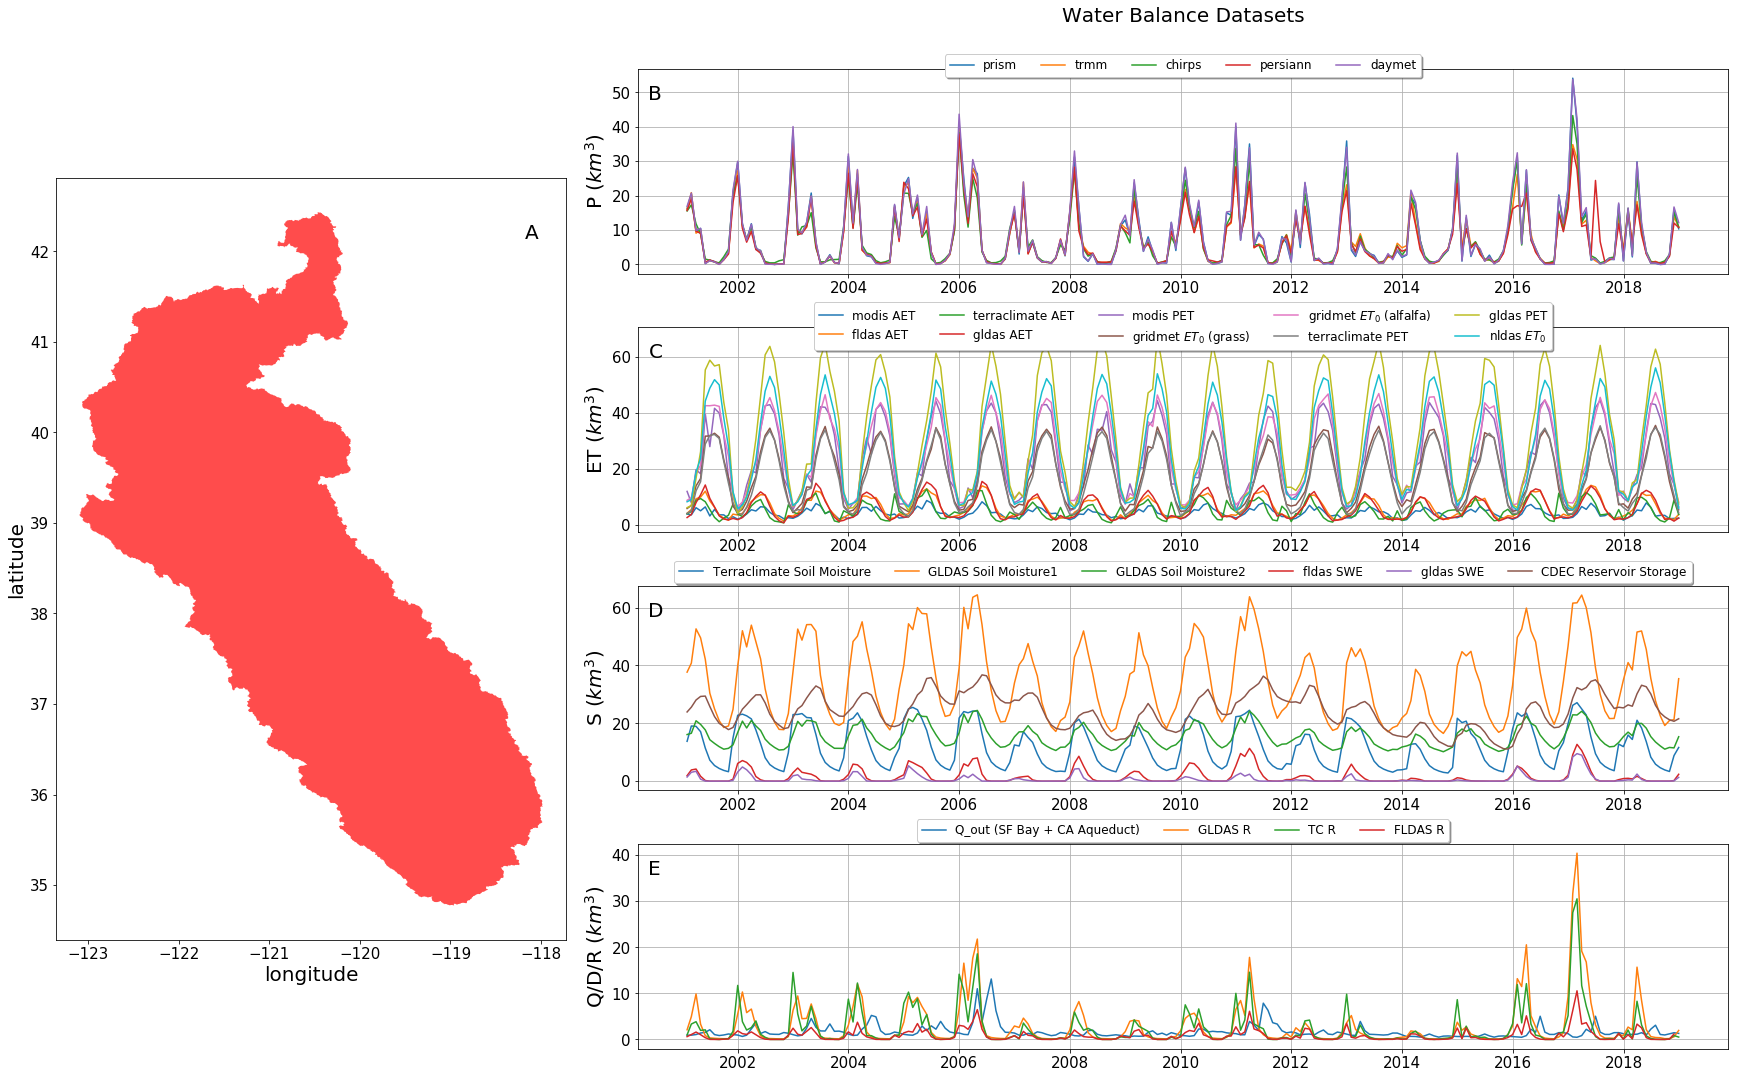

In [647]:
# Plot all the data for CVW

plt.figure(figsize=(25, 15))

G = gridspec.GridSpec(4, 3)

# Plot the basemaps
axes_1 = plt.subplot(G[:, 0])
cvw.plot(ax=axes_1, color = "red", alpha = 0.7)
axes_1.set_xlabel("longitude", size = 20)
axes_1.set_ylabel("latitude", size = 20)
axes_1.annotate("A", xy=(0.92, 0.92), xycoords="axes fraction", size = 20)
axes_1.tick_params(axis='both', which='major', labelsize=15)

# Precip
axes_2 = plt.subplot(G[0:1, 1:])
axes_2.set_title("Water Balance Datasets", size = 20, y=1.2)
axes_2.plot(cvwdf.index, cvwdf.p_prism, label = "prism")
axes_2.plot(cvwdf.index, cvwdf.p_trmm, label = "trmm")
axes_2.plot(cvwdf.index, cvwdf.p_chirps, label = "chirps")
axes_2.plot(cvwdf.index, cvwdf.p_persiann, label = "persiann")
axes_2.plot(cvwdf.index, cvwdf.p_daymet, label = "daymet")
axes_2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), fancybox=True, shadow=True, ncol=7, prop = {"size":12})
axes_2.set_ylabel("P ($km^3$)", size = 20)
# axes_2.set_xticklabels([])
axes_2.annotate("B", xy=(0.01, 0.85), xycoords="axes fraction", size = 20)
axes_2.tick_params(axis='both', which='major', labelsize=15)
axes_2.grid(True)

# AET
axes_3 = plt.subplot(G[1:2, 1:])
axes_3.plot(cvwdf.index, cvwdf.modis_aet, label = "modis AET")
axes_3.plot(cvwdf.index, cvwdf.fldas_aet, label = "fldas AET")
axes_3.plot(cvwdf.index, cvwdf.tc_aet, label = "terraclimate AET")
axes_3.plot(cvwdf.index, cvwdf.gldas_aet, label = "gldas AET")

# PET
axes_3.plot(cvwdf.index, cvwdf.modis_pet, label = "modis PET")
axes_3.plot(cvwdf.index, cvwdf.gmet_eto, label = "gridmet $ET_0$ (grass)")
axes_3.plot(cvwdf.index, cvwdf.gmet_etr, label = "gridmet $ET_0$ (alfalfa)")
axes_3.plot(cvwdf.index, cvwdf.tc_pet, label = "terraclimate PET")
axes_3.plot(cvwdf.index, cvwdf.gldas_etr, label = "gldas PET")
axes_3.plot(cvwdf.index, cvwdf.nldas_etr, label = "nldas $ET_0$")

axes_3.set_ylabel("ET ($km^3$)", size = 20)
axes_3.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=5, prop = {"size":12})
axes_3.annotate("C", xy=(0.01, 0.85), xycoords="axes fraction", size = 20)
axes_3.tick_params(axis='both', which='major', labelsize=15)
axes_3.grid(True)

# SM / SWE / Surface Storage
axes_4 = plt.subplot(G[2:3, 1:])
axes_4.plot(cvwdf.index, cvwdf.tc_sm, label = "Terraclimate Soil Moisture")
axes_4.plot(cvwdf.index, cvwdf.gldas_sm, label = "GLDAS Soil Moisture1")
axes_4.plot(cvwdf.index, cvwdf.gldas_m, label = "GLDAS Soil Moisture2")
axes_4.plot(cvwdf.index, cvwdf.fldas_swe, label = "fldas SWE")
axes_4.plot(cvwdf.index, cvwdf.gldas_swe, label = "gldas SWE")
axes_4.plot(cvwdf.index, cvwdf.storage_km3, label = "CDEC Reservoir Storage")
axes_4.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=7, prop = {"size":12})
axes_4.set_ylabel("S ($km^3$)", size = 20)
axes_4.annotate("D", xy=(0.01, 0.85), xycoords="axes fraction", size = 20)
axes_4.tick_params(axis='both', which='major', labelsize=15)
axes_4.grid(True)

axes_5 = plt.subplot(G[3:4, 1:])
axes_5.plot(cvwdf.index, cvwdf.q_out, label = "Q_out (SF Bay + CA Aqueduct)")
axes_5.plot(cvwdf.index, cvwdf.gldas, label = "GLDAS R")
axes_5.plot(cvwdf.index, cvwdf.tc_r, label = "TC R")
axes_5.plot(cvwdf.index, cvwdf.fldas_r, label = "FLDAS R")
axes_5.set_ylabel("Q/D/R ($km^3$)", size = 20)
axes_5.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=7, prop = {"size":12})
axes_5.annotate("E", xy=(0.01, 0.85), xycoords="axes fraction", size = 20)
axes_5.tick_params(axis='both', which='major', labelsize=15)
axes_5.grid(True)

plt.tight_layout()

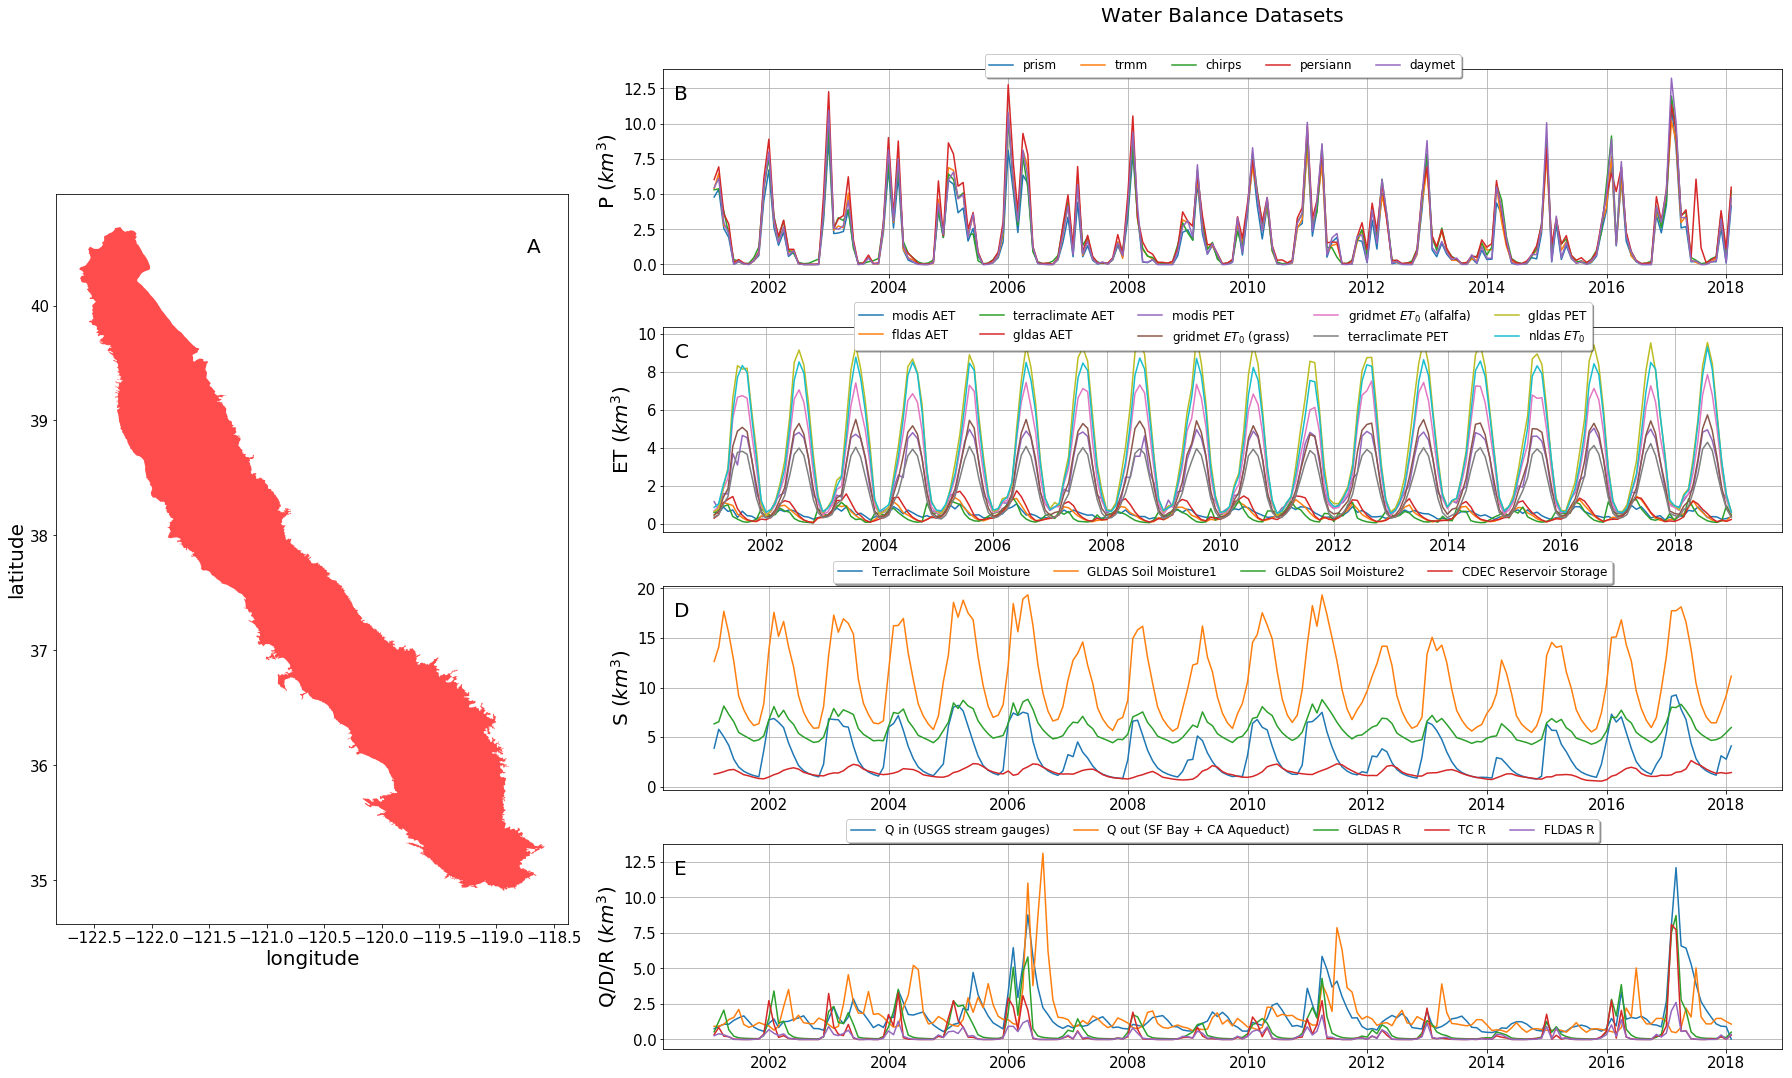

In [648]:
# Plot all the data for CV
cv_df = df.copy()

plt.figure(figsize=(25, 15))

G = gridspec.GridSpec(4, 3)

# Plot the basemaps
axes_1 = plt.subplot(G[:, 0])
cvsa.plot(ax=axes_1, color = "red", alpha = 0.7)
# axes_1.set_title('''
#     CV Watershed area = {} $km^2$ 
# '''.format(round(sa_km3, 3)), size = 20)
axes_1.set_xlabel("longitude", size = 20)
axes_1.set_ylabel("latitude", size = 20)
axes_1.annotate("A", xy=(0.92, 0.92), xycoords="axes fraction", size = 20)
axes_1.tick_params(axis='both', which='major', labelsize=15)

axes_2 = plt.subplot(G[0:1, 1:])
axes_2.set_title("Water Balance Datasets", size = 20, y=1.2)
axes_2.plot(cv_df.index, cv_df.p_prism, label = "prism")
axes_2.plot(cv_df.index, cv_df.p_trmm, label = "trmm")
axes_2.plot(cv_df.index, cv_df.p_chirps, label = "chirps")
axes_2.plot(cv_df.index, cv_df.p_persiann, label = "persiann")
axes_2.plot(cv_df.index, cv_df.p_daymet, label = "daymet")
axes_2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), fancybox=True, shadow=True, ncol=7, prop = {"size":12})
axes_2.set_ylabel("P ($km^3$)", size = 20)
# axes_2.set_xticklabels([])
axes_2.annotate("B", xy=(0.01, 0.85), xycoords="axes fraction", size = 20)
axes_2.tick_params(axis='both', which='major', labelsize=15)
axes_2.grid(True)

axes_3 = plt.subplot(G[1:2, 1:])
axes_3.plot(cv_df.index, cv_df.modis_aet, label = "modis AET")
axes_3.plot(cv_df.index, cv_df.fldas_aet, label = "fldas AET")
axes_3.plot(cv_df.index, cv_df.tc_aet, label = "terraclimate AET")
axes_3.plot(cv_df.index, cv_df.gldas_aet, label = "gldas AET")

axes_3.plot(cv_df.index, cv_df.modis_pet, label = "modis PET")
axes_3.plot(cv_df.index, cv_df.gmet_eto, label = "gridmet $ET_0$ (grass)")
axes_3.plot(cv_df.index, cv_df.gmet_etr, label = "gridmet $ET_0$ (alfalfa)")
axes_3.plot(cv_df.index, cv_df.tc_pet, label = "terraclimate PET")
axes_3.plot(cv_df.index, cv_df.gldas_etr, label = "gldas PET")
axes_3.plot(cv_df.index, cv_df.nldas_etr, label = "nldas $ET_0$")

axes_3.set_ylabel("ET ($km^3$)", size = 20)
axes_3.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=5, prop = {"size":12})
axes_3.annotate("C", xy=(0.01, 0.85), xycoords="axes fraction", size = 20)
axes_3.tick_params(axis='both', which='major', labelsize=15)
axes_3.grid(True)

axes_4 = plt.subplot(G[2:3, 1:])
axes_4.plot(cv_df.index, cv_df.tc_sm, label = "Terraclimate Soil Moisture")
axes_4.plot(cv_df.index, cv_df.gldas_sm, label = "GLDAS Soil Moisture1")
axes_4.plot(cv_df.index, cv_df.gldas_m, label = "GLDAS Soil Moisture2")
# axes_4.plot(cv_df.index, cv_df.fldas_swe, label = "fldas SWE")
# axes_4.plot(cv_df.index, cv_df.gldas_swe, label = "gldas SWE")
axes_4.plot(cv_df.index, cv_df.storage_km3, label = "CDEC Reservoir Storage")
axes_4.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=7, prop = {"size":12})
axes_4.set_ylabel("S ($km^3$)", size = 20)
axes_4.annotate("D", xy=(0.01, 0.85), xycoords="axes fraction", size = 20)
axes_4.tick_params(axis='both', which='major', labelsize=15)
axes_4.grid(True)

axes_5 = plt.subplot(G[3:4, 1:])
axes_5.plot(cv_df.index, cv_df.q_in, label = "Q in (USGS stream gauges)")
axes_5.plot(cv_df.index, cv_df.q_out, label = "Q out (SF Bay + CA Aqueduct)")
axes_5.plot(cv_df.index, cv_df.gldas, label = "GLDAS R")
axes_5.plot(cv_df.index, cv_df.tc_r, label = "TC R")
axes_5.plot(cv_df.index, cv_df.fldas_r, label = "FLDAS R")
axes_5.set_ylabel("Q/D/R ($km^3$)", size = 20)
axes_5.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=7, prop = {"size":12})
axes_5.annotate("E", xy=(0.01, 0.85), xycoords="axes fraction", size = 20)
axes_5.tick_params(axis='both', which='major', labelsize=15)
axes_5.grid(True)

plt.tight_layout()

In [659]:
# calculate means for the CV (df)
df["aet_mean"] = np.mean([df['fldas_aet'], df['gldas_aet'],df['modis_aet'],df['tc_aet']],axis = 0)
df["pet_mean"] = np.mean([df['modis_pet'],df['tc_pet'],df['gmet_eto'],df['gmet_etr']],axis = 0) # We drop GLDAS and NLDAS as they are biased high 
df['et_mean'] = np.mean([df['pet_mean'], df['aet_mean']], axis = 0) # Very 
df["p_mean"] = np.mean([df['p_prism'], df['p_chirps'],df['p_persiann'],df['p_trmm'],df['p_daymet']],axis = 0)
df['sm_mean'] = np.mean([df['gldas_sm'], df['tc_sm'], df["gldas_m"]],axis = 0)
df['r_mean'] = np.mean([df['gldas'], df['fldas_r'], df["tc_r"], df['q_in']],axis = 0)
# Compute the effective runoff as mean(cvw_runoff) - mean(cv_runoff)
df['r_eff'] = np.mean([cvwdf['gldas'], cvwdf['fldas_r'], cvwdf["tc_r"]],axis = 0) - np.mean([df['gldas'], df['fldas_r'], df["tc_r"], df['q_in']],axis = 0)

# Calc means for the CV Watershed (cvwdf)
cvwdf["aet_mean"] = np.mean([cvwdf['fldas_aet'], cvwdf['gldas_aet'],cvwdf['modis_aet'],cvwdf['tc_aet']],axis = 0)
cvwdf["pet_mean"] = np.mean([cvwdf['modis_pet'],cvwdf['tc_pet'],cvwdf['gmet_eto'], cvwdf['gmet_etr']],axis = 0)
cvwdf['et_mean'] = np.mean([cvwdf['pet_mean'], cvwdf['aet_mean']], axis = 0)
cvwdf["p_mean"] = np.mean([cvwdf['p_prism'], cvwdf['p_chirps'],cvwdf['p_persiann'],cvwdf['p_trmm'],cvwdf['p_daymet']],axis = 0)
cvwdf['sm_mean'] = np.mean([cvwdf['gldas_sm'], cvwdf['tc_sm'], cvwdf["gldas_m"]],axis = 0)
cvwdf['swe_mean'] =  np.mean([cvwdf['fldas_swe'],cvwdf['gldas_swe']], axis = 0)

cvwdf['et_eff'] = np.sum([df['et_eff'], cvwdf['aet_mean']],axis = 0)


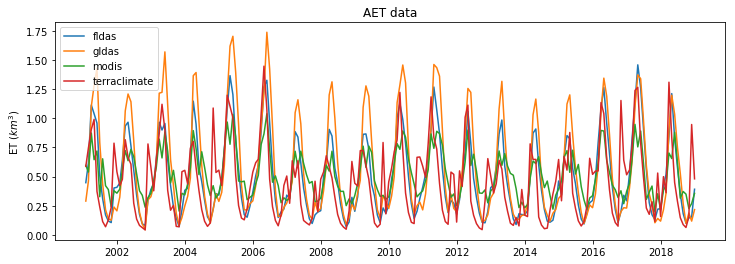

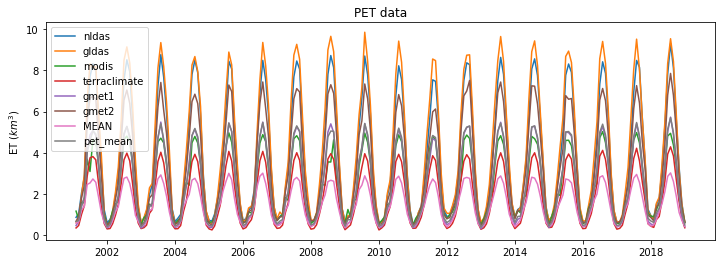

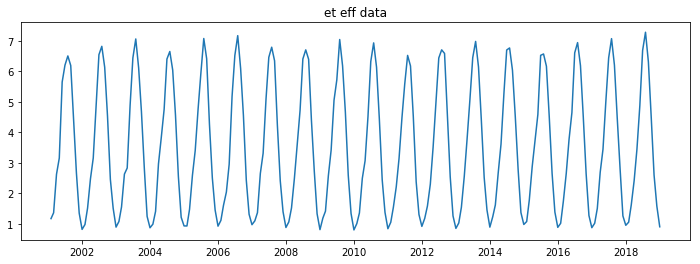

In [650]:
# Check the ET specifically for CV 

plt.figure(figsize = (12,4))
plt.title("AET data")
plt.plot(df.fldas_aet, label = "fldas")
plt.plot(df.gldas_aet, label = 'gldas')
plt.plot(df.modis_aet, label = 'modis')
plt.plot(df.tc_aet, label = "terraclimate")
plt.ylabel("ET ($km^3$)")
plt.legend()

plt.figure(figsize = (12,4))
plt.title("PET data")
plt.plot(df.nldas_etr, label = "nldas")
plt.plot(df.gldas_etr, label = 'gldas')
plt.plot(df.modis_pet, label = 'modis')
plt.plot(df.tc_pet, label = "terraclimate")
plt.plot(df.gmet_eto, label = "gmet1")
plt.plot(df.gmet_etr, label = "gmet2")
plt.plot(df.et_mean, label = "MEAN")

plt.plot(df.pet_mean)
plt.ylabel("ET ($km^3$)")
plt.legend()

plt.figure(figsize = (12,4))
plt.title("et eff data")
plt.plot(df.et_eff, label = "effective et")

In [651]:
# TODO: include the code to Process the GRACE data 

# Grace data

grace = pd.read_csv("../data/grace_argus.csv")

# Initialize the datetime columns
grace['dt'] = pd.to_datetime(grace[grace.columns[0]])
grace = grace.set_index(pd.to_datetime(grace[grace.columns[0]]))
grace.drop(["dt"],axis = 1, inplace = True)

# Subtract reservoir storage, soil moisture, SWE from grace 
grace['adj'] = grace.grace_mean[1:] - cvwdf.sm_mean.diff()[1:] - cvwdf.storage_km3.diff()[1:] - cvwdf.swe_mean.diff()[1:]

# Wells data (processed by zihan using Faunt 2009 SY values )
wells = pd.read_csv("../data/wells_ds_faunt_sy.csv")
wells.month = wells.month.astype(str)
wells.year = wells.year.astype(str)
wells.month = wells.month.str.zfill(2)

wells['Date'] = pd.to_datetime(wells.year + wells.month , format="%Y%m") + MonthEnd(1)
wells.index = wells.Date
wells.drop(['Date'], axis =1, inplace = True)

wells['ds_km3'] = wells[wells.columns[-1]] * 55000 * 1e-5

# c2vsim storage data 
c2vs = pd.read_csv("../data/all_data_cv.csv")
c2vs.ds = c2vs.s.diff()
df['c2vsim'] = c2vs.s.diff().values[-len(df):]

In [652]:
# Do the balances

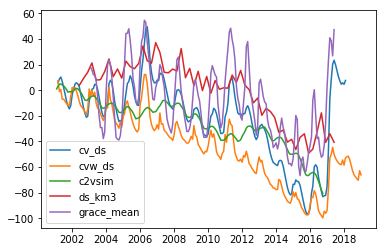

In [674]:
# Equations 1 and 3 in paper
df["cv_ds"] = df.p_mean - (df.et_eff) - df.q_out + df.q_in + df.r_eff - df.sm_mean.diff() - df.storage_km3.diff() 
cvwdf["cvw_ds"] = cvwdf.p_mean - (cvwdf.aet_mean + df.et_mean) - cvwdf.q_out  - cvwdf.sm_mean.diff() - cvwdf.storage_km3.diff() - cvwdf.swe_mean.diff()

plt.plot(np.cumsum(df.cv_ds))
plt.plot(np.cumsum(cvwdf.cvw_ds))
plt.plot(np.cumsum(df.c2vsim))
plt.plot(wells.ds_km3)
plt.plot(grace.grace_mean)
plt.legend()

plt.show()

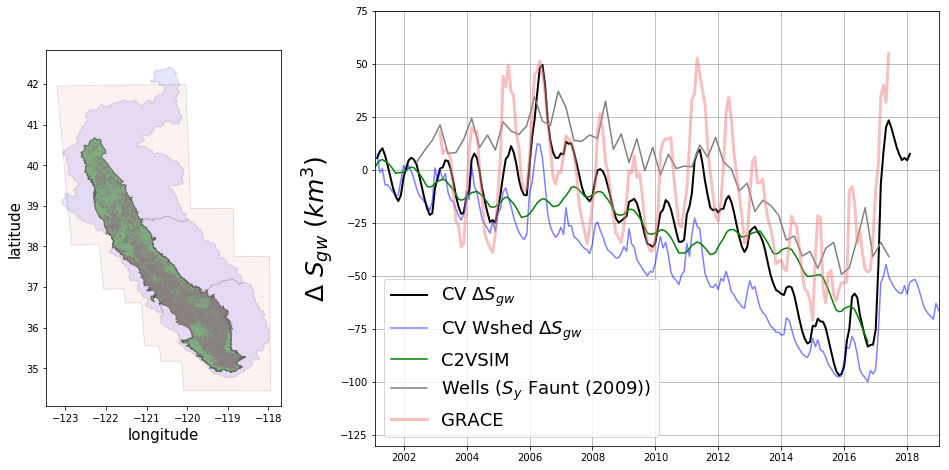

In [675]:
plt.figure(figsize=(16, 8))

G = gridspec.GridSpec(2, 3)

# Plot the basemaps
ax = plt.subplot(G[:, 0])

# Plot the huc4s
s.plot(ax = ax, color = 'blue', alpha = 0.1, edgecolor = "black")
sj.plot(ax = ax, color = 'blue', alpha = 0.1, edgecolor = "black")
t.plot(ax = ax, color = 'blue', alpha = 0.1,  edgecolor = "black")

# Rivers, CV, canals, CA, irrigated, non irrigated
# rivers.plot(ax = ax, color = "blue", label = "major rivers")
cvsa.plot(ax = ax, color = "green", edgecolor = "black", alpha = 0.5, label = "central valley")
# canals.plot(ax = ax, color = "red", edgecolor = "none", alpha = 0.5, label = "CVP canals / aqueducts")
casgem.plot(ax = ax, marker = ".", markersize = 0.1, color = 'gray')
# irrigated.plot(ax = ax, color = "green", alpha = 0.7, label = "irrigated")
# non_irrigated.plot(ax = ax, color = "yellow", alpha = 0.7, label = 'non-irrigated')
grace_sa.plot(ax = ax, color = "lightcoral", alpha = 0.1, edgecolor = 'black')

plt.ylabel('latitude', size = 15)
plt.xlabel('longitude', size = 15)

# Plot the timeseries
axes_4 = plt.subplot(G[0:2, 1:])
axes_4.plot(df.index, np.cumsum(df.cv_ds), color="black", linewidth = 2, label = "CV $\Delta S_{gw}$")
axes_4.plot(df.index, np.cumsum(cvwdf.cvw_ds), color="blue",alpha = 0.5, label = "CV Wshed $\Delta S_{gw}$")
axes_4.plot(df.index, np.cumsum(df.c2vsim), color="green", label = "C2VSIM")
# axes_4.plot(df2.index, np.cumsum(df2.ds), color="red", label = "CVW $\Delta S_{gw}$ ")
axes_4.plot(wells.index, wells.ds_km3, color="gray", label = "Wells ($S_y$ Faunt (2009))")
axes_4.plot(grace.index, grace.adj, color="lightcoral", linewidth = 3, alpha = .5, label = "GRACE")

axes_4.set_ylim(-130,75)
axes_4.set_xlim(df.index[0],df.index[-1])

axes_4.set_ylabel('$\Delta$ $S_{gw}$ ($km^3$)', size = 25) 
axes_4.legend(loc = "lower left",  prop={'size':18})

plt.grid(True)
G.update(wspace=0.4, hspace=0.3) # set the spacing between axes. 

# plt.tight_layout()
plt.show()

In [676]:
df.to_csv("../data/WRR_cv_balance_fin.csv")
cvwdf.to_csv("../data/WRR_cvw_balance_fin.csv")

In [678]:
# Do triple collocation on grace, wells, rs model

def calc_tc_error(x,y,z):
    e_x = np.sqrt(np.abs(np.mean((x - y) * (x - z))))
    e_y = np.sqrt(np.abs(np.mean((y - x) * (y - z))))
    e_z = np.sqrt(np.abs(np.mean((z - x) * (z - y))))

    return e_x, e_y, e_z

def scale_to_ref(src, ref):
    return ((src - np.mean(src)) /
            np.std(src)) * np.std(ref) + np.mean(ref)

In [679]:
from itertools import combinations

tc_dat = [np.cumsum(df.cv_ds), wells.ds_km3, np.cumsum(df.c2vsim), grace.adj]

combos=combinations([0,1,2,3], 3) 

out = {0:[], # rs
       1:[], # wells
       2:[], # c2vsim
       3:[]  # grace 
        }

# out = {}

for idx,i in enumerate(combos):
    x = tc_dat[i[0]]
    y = tc_dat[i[1]]
    z = tc_dat[i[2]]
    
    y_scaled = scale_to_ref(y,x)
    z_scaled = scale_to_ref(z,x)

    e_x, e_y, e_z = calc_tc_error(x, y_scaled, z_scaled)
    
    errors = calc_tc_error(x, y_scaled, z_scaled)
    
    for idx,j in enumerate(i):
        out[j].append(errors[idx])
        
D = {k:np.array(v).mean() for k,v in out.items() }
maxs = {k:np.array(v).max() for k,v in out.items() }
mins = {k:np.array(v).min() for k,v in out.items() }

In [681]:
# Merge all the DFS and create a mean error 

merged1 = pd.merge(df, wells, left_index=True, right_index=True, how = "outer")
merged2 = pd.merge(merged1, grace, left_index=True, right_index=True, how = "outer")

for idx,x in enumerate(["cv_ds",'ds_km3', "c2vsim",'adj']):
    merged2[x+"_max"] = merged2[x] + D[idx]
    merged2[x+"_min"] = merged2[x] - D[idx]
    
merged2['cs'] = np.cumsum(df.cv_ds)
merged2['ds_mean'] = np.nanmean(merged2[["cs",'ds_km3', "c2vsim",'adj']], axis = 1)
merged2['upper_bound'] = np.nanmean(merged2[["cs",'ds_km3_max', "c2vsim_max",'adj_max']], axis = 1)
merged2['lower_bound'] = np.nanmean(merged2[["cs",'ds_km3_min', "c2vsim_min",'adj_min']], axis = 1)

/anaconda3/envs/gis/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/envs/gis/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
/anaconda3/envs/gis/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]


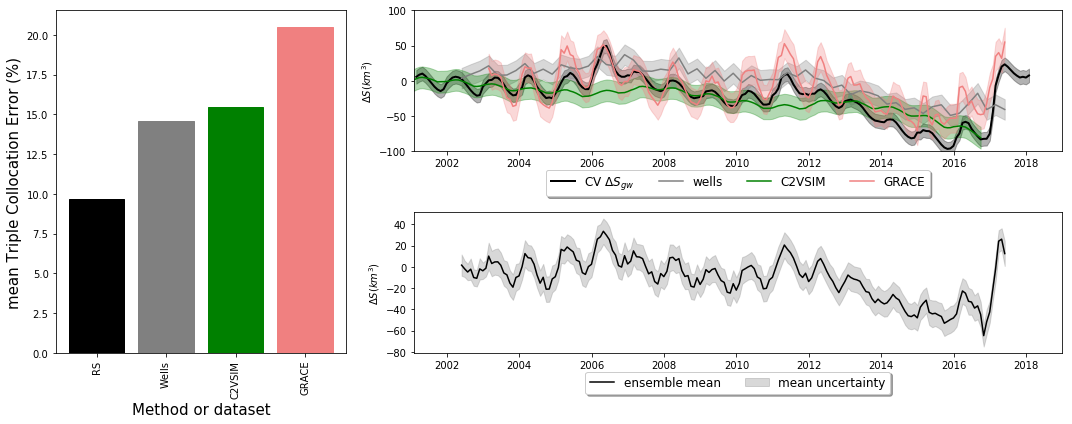

In [682]:
# Plot the TC bar chart and time series
plt.figure(figsize = (15,6))

G = gridspec.GridSpec(4, 3)

# Plot the basemaps
ax = plt.subplot(G[:, 0])

bars = plt.bar(range(len(D)), list(D.values()), align='center')
bars[0].set_color('black')
bars[1].set_color('gray')
bars[2].set_color('green')
bars[-1].set_color('lightcoral')
plt.xticks(range(len(D)), ["RS", "Wells", "C2VSIM", "GRACE"], rotation='vertical')
plt.ylabel("mean Triple Collocation Error (%)", size = 15)
plt.xlabel("Method or dataset", size = 15)

# ax2 = plt.subplot(G[:, 0])
axes_2 = plt.subplot(G[0:2, 1:])
axes_2.plot(df.index, np.cumsum(df.cv_ds), color="black", linewidth = 2, label = "CV $\Delta S_{gw}$")
axes_2.fill_between(df.index, np.cumsum(df.cv_ds)+D[0], np.cumsum(df.cv_ds)-D[0], color="black", alpha = 0.3)
# axes_2.fill_between(df.index, np.cumsum(df.cv_ds)+maxs[0], np.cumsum(df.cv_ds)-maxs[0], color="black", alpha = 0.1)

axes_2.plot(wells.index,wells.ds_km3, color="gray", label = "wells")
axes_2.fill_between(wells.index, wells.ds_km3+D[1],wells.ds_km3-D[1], color="gray", alpha = 0.3)
# axes_2.fill_between(wells.index, wells.ds_km3+maxs[1],wells.ds_km3-maxs[1], color="gray", alpha = 0.1)

axes_2.plot(df.index, np.cumsum(df.c2vsim), color="green", label = "C2VSIM")
axes_2.fill_between(df.index, np.cumsum(df.c2vsim)+D[2], np.cumsum(df.c2vsim)-D[2], color="green", alpha = 0.3)
# axes_2.fill_between(df.index, np.cumsum(df.c2vsim)+maxs[2], np.cumsum(df.c2vsim)-maxs[2], color="green", alpha = 0.1)

axes_2.plot(grace.index, grace.adj, color="lightcoral", label = "GRACE")
axes_2.fill_between(grace.index, grace.adj+D[3],  grace.adj-D[3], color="lightcoral", alpha = 0.3)
# axes_2.fill_between(grace.index, grace.adj+maxs[3],  grace.adj-maxs[3], color="lightcoral", alpha = 0.1)

axes_2.set_ylim([-100,100])
axes_2.set_xlim(df.index[0],df.index[-1])
axes_2.set_ylabel("$\Delta S (km^3)$")
axes_2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.09), fancybox=True, shadow=True, ncol=7, prop = {"size":12})

axes_3 = plt.subplot(G[2:4, 1:])

axes_3.plot(merged2.ds_mean[16:-19], color = "black", label = 'ensemble mean')
axes_3.fill_between(merged2.index[16:-19], merged2.upper_bound[16:-19], merged2.lower_bound[16:-19] ,color = "gray", alpha = 0.3, label = "mean uncertainty")
axes_3.set_xlim(df.index[0],df.index[-1])
axes_3.set_ylabel("$\Delta S (km^3)$")
axes_3.legend(loc='upper center', bbox_to_anchor=(0.5, -0.09), fancybox=True, shadow=True, ncol=7, prop = {"size":12})

plt.tight_layout()
plt.show()